In [1]:
import pandas as pd

df = pd.read_parquet("data/dados_tratados.parquet")

### **1. Codificação de Variáveis Categóricas**

Codificação das variáveis `holiday`, `weather_main` e `weather_description`.

In [51]:
from sklearn.calibration import LabelEncoder


df = df.reset_index().drop(columns=["index"])
df_cat = df.copy()

# Holiday
holidays = list(set(df.holiday.to_list()))

holidays[0] = "None"
df_cat["holiday"] = df_cat["holiday"].apply(lambda x: "None" if not x else x)
df_cat["holiday"] = pd.Categorical(df_cat["holiday"], categories=holidays, ordered=True)
df_cat["holiday"] = df_cat["holiday"].cat.codes

le = LabelEncoder()
# weather
weather_main = list(set(df.weather_main.to_list()))
df_cat["weather_main"] = le.fit_transform(df_cat["weather_main"])
df_cat["weather_description"] = le.fit_transform(df_cat["weather_description"])
df_cat

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,0,288.28,0.0,0.0,40,1,18,2012-10-02 09:00:00,5545
1,0,289.36,0.0,0.0,75,1,0,2012-10-02 10:00:00,4516
2,0,289.58,0.0,0.0,90,1,15,2012-10-02 11:00:00,4767
3,0,290.13,0.0,0.0,90,1,15,2012-10-02 12:00:00,5026
4,0,291.14,0.0,0.0,75,1,0,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
40523,0,283.45,0.0,0.0,75,1,0,2018-09-30 19:00:00,3543
40524,0,282.76,0.0,0.0,90,1,15,2018-09-30 20:00:00,2781
40525,0,282.73,0.0,0.0,90,8,17,2018-09-30 21:00:00,2159
40526,0,282.09,0.0,0.0,90,1,15,2018-09-30 22:00:00,1450


### **2. Normalização dos dados**

In [ ]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler


scaler = StandardScaler()
df_escala = df_cat.copy()
df_escala[["rain_1h", "snow_1h", "temp"]] = scaler.fit_transform(df_escala[["rain_1h", "snow_1h", "temp"]])


scaler = MinMaxScaler()
df_escala[["clouds_all"]] = scaler.fit_transform(df_escala[["clouds_all"]])

<Axes: >

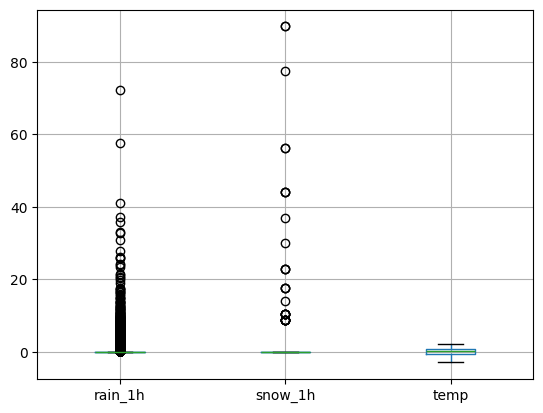

In [72]:
df_escala[["rain_1h", "snow_1h", "temp"]].boxplot()

In [80]:
df_escala.to_parquet("data/dados_padronizados.parquet")